# Simple Regression Example

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

#### Generate some random data

In [3]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
x_data

array([ 1.30742023, -0.12775835,  0.76387018,  2.23503439,  4.79441213,
        5.60311723,  8.02915604,  6.29380959,  7.76614729,  9.22036757])

In [5]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)
y_label

array([ -0.06721284,   0.86964824,   2.38966499,   4.73602748,
         3.39408025,   6.18616241,   7.91666632,   6.52315082,
         9.2031405 ,  11.10157387])

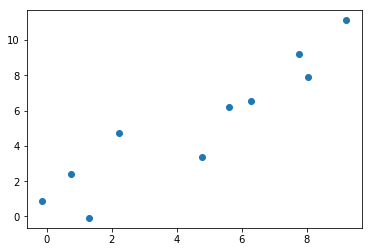

In [12]:
plt.scatter(x_data, y_label)

#### Create a TensorFlow model

In [31]:
m = tf.Variable(-0.44)
b = tf.Variable(0.87)

In [32]:
error = 0
for x,y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

Note: **the `error` is an Operation object! **  
The above `for` loop didn't do any calculation, it just constructed the relationship between `error` and `m`, `b`.

In [33]:
error

<tf.Tensor 'add_39:0' shape=() dtype=float32>

In [34]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)
init = tf.global_variables_initializer()

In [37]:
with tf.Session() as sess:
    sess.run(init)
    traing_stes = 100
    for i in range(traing_stes):
        sess.run(train)
    final_slope, final_intercept = sess.run([m,b])

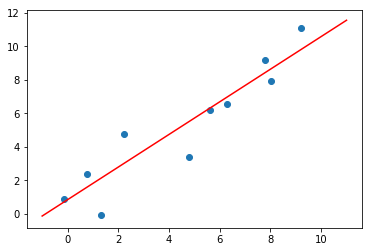

In [38]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept
plt.plot(x_test, y_pred_plot, 'r')
plt.scatter(x_data, y_label)